# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [18]:
import json, pickle

from statistics import mean, stdev

import tensorflow as tf
from tensorflow.keras.models import load_model
from dataset.dataset_padchest import *
from utils.recommendation import *

In [4]:
@tf.function()
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], config['model']['latent_dim']), mean=0., stddev=0.1)
    return z_mean + tf.math.exp(z_log_sigma) * epsilon

# Data load

In [5]:
with open('', 'r') as f:
    config = json.load(f)

In [6]:
data = Dataset(config)

with open(config["PATHS"]["IMAGES_PATH"] + "", 'rb') as f:
    data = pickle.load(f)

# Nearest neighbors

In [7]:
MODEL_PATH = ''

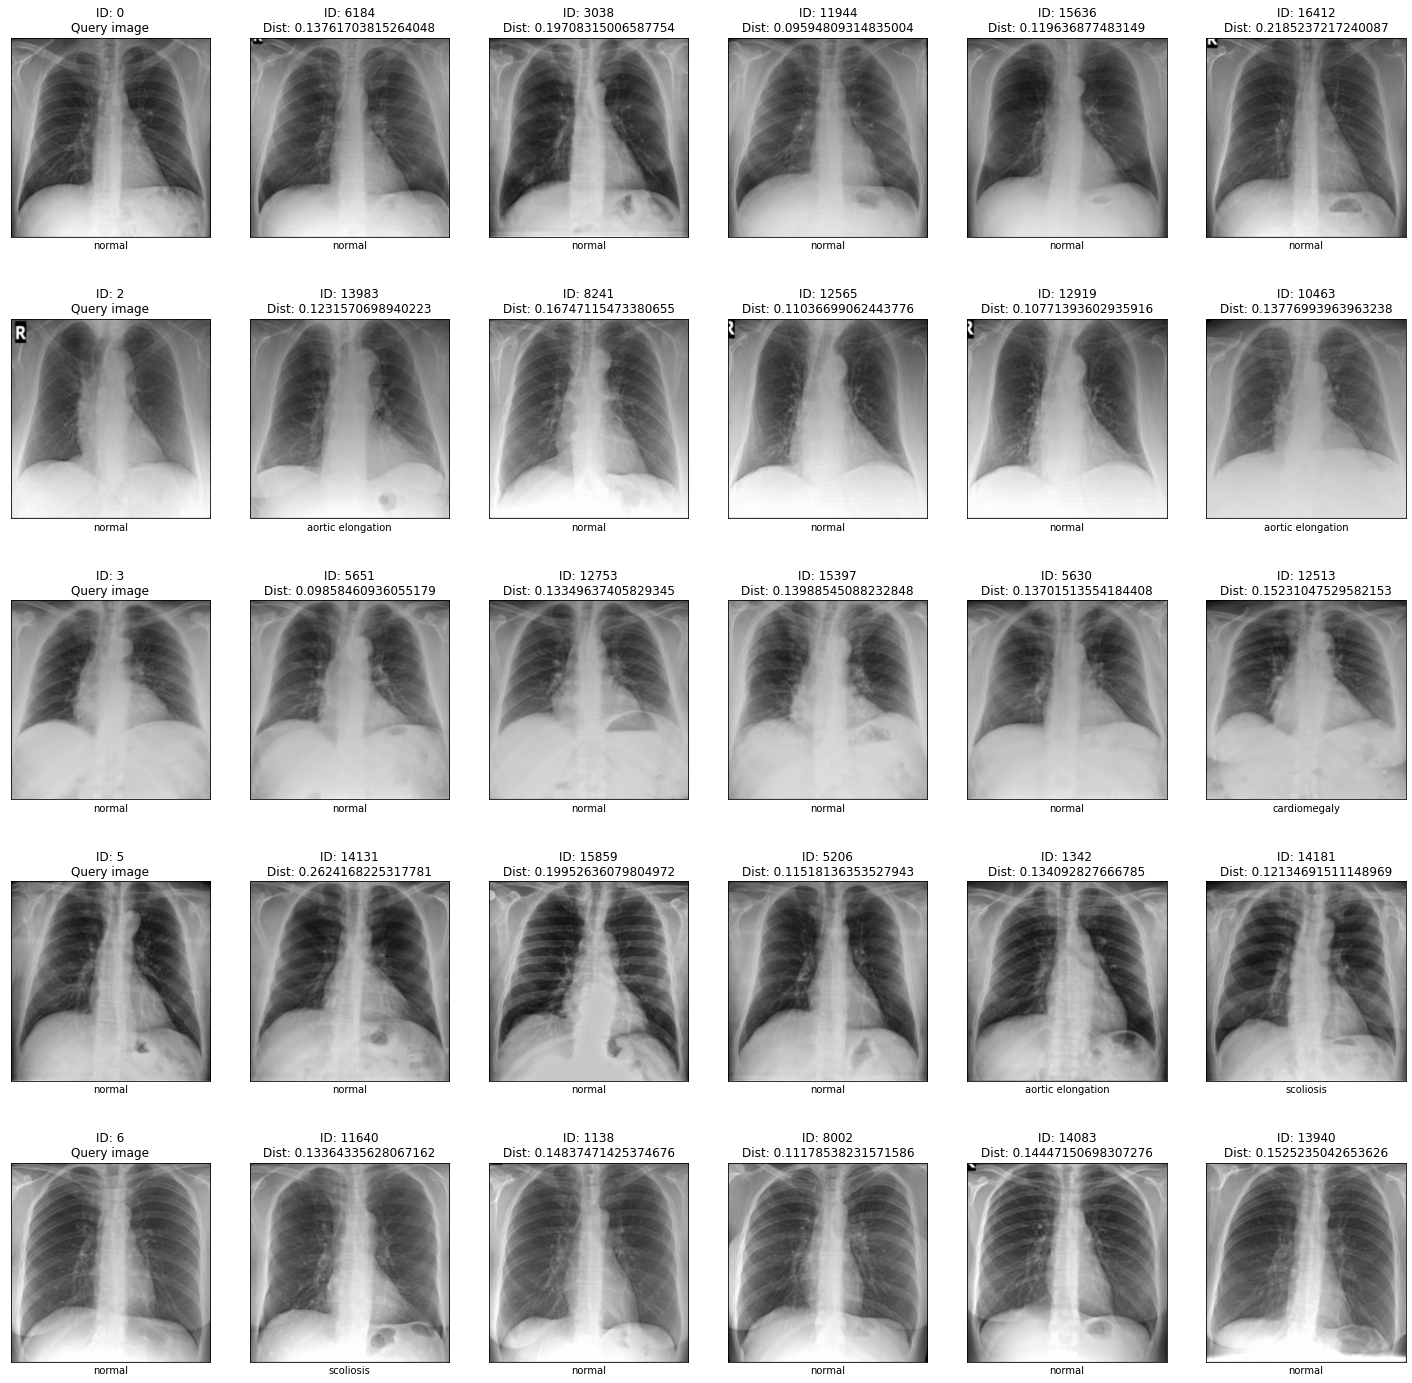

In [30]:
encoder = load_model(MODEL_PATH + '_v3_MOCVAE/models/e_best_encoder.h5', custom_objects={'sampling': sampling})

plot_nneighbors_filtered(data, encoder, n_neighbors=5, n_cases=5, vae=True, label="normal")

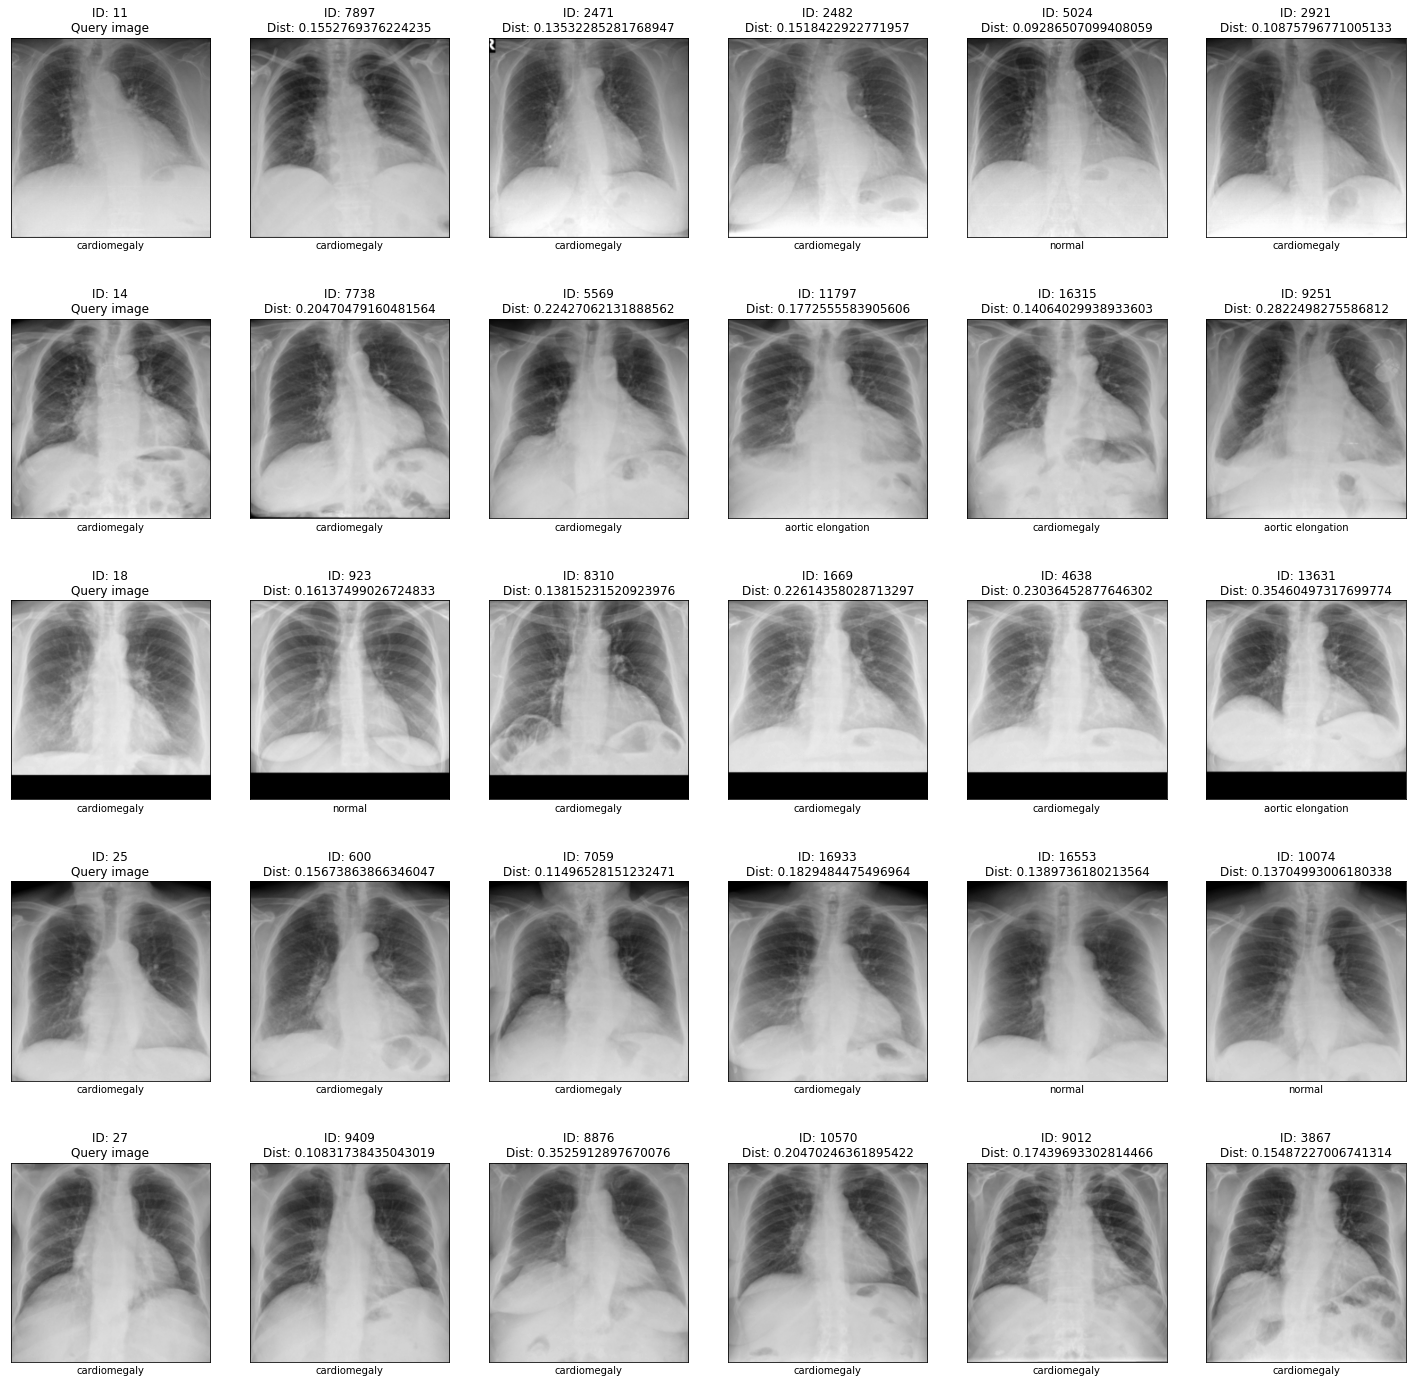

In [32]:
plot_nneighbors_filtered(data, encoder, n_neighbors=5, n_cases=5, vae=True, label="cardiomegaly")

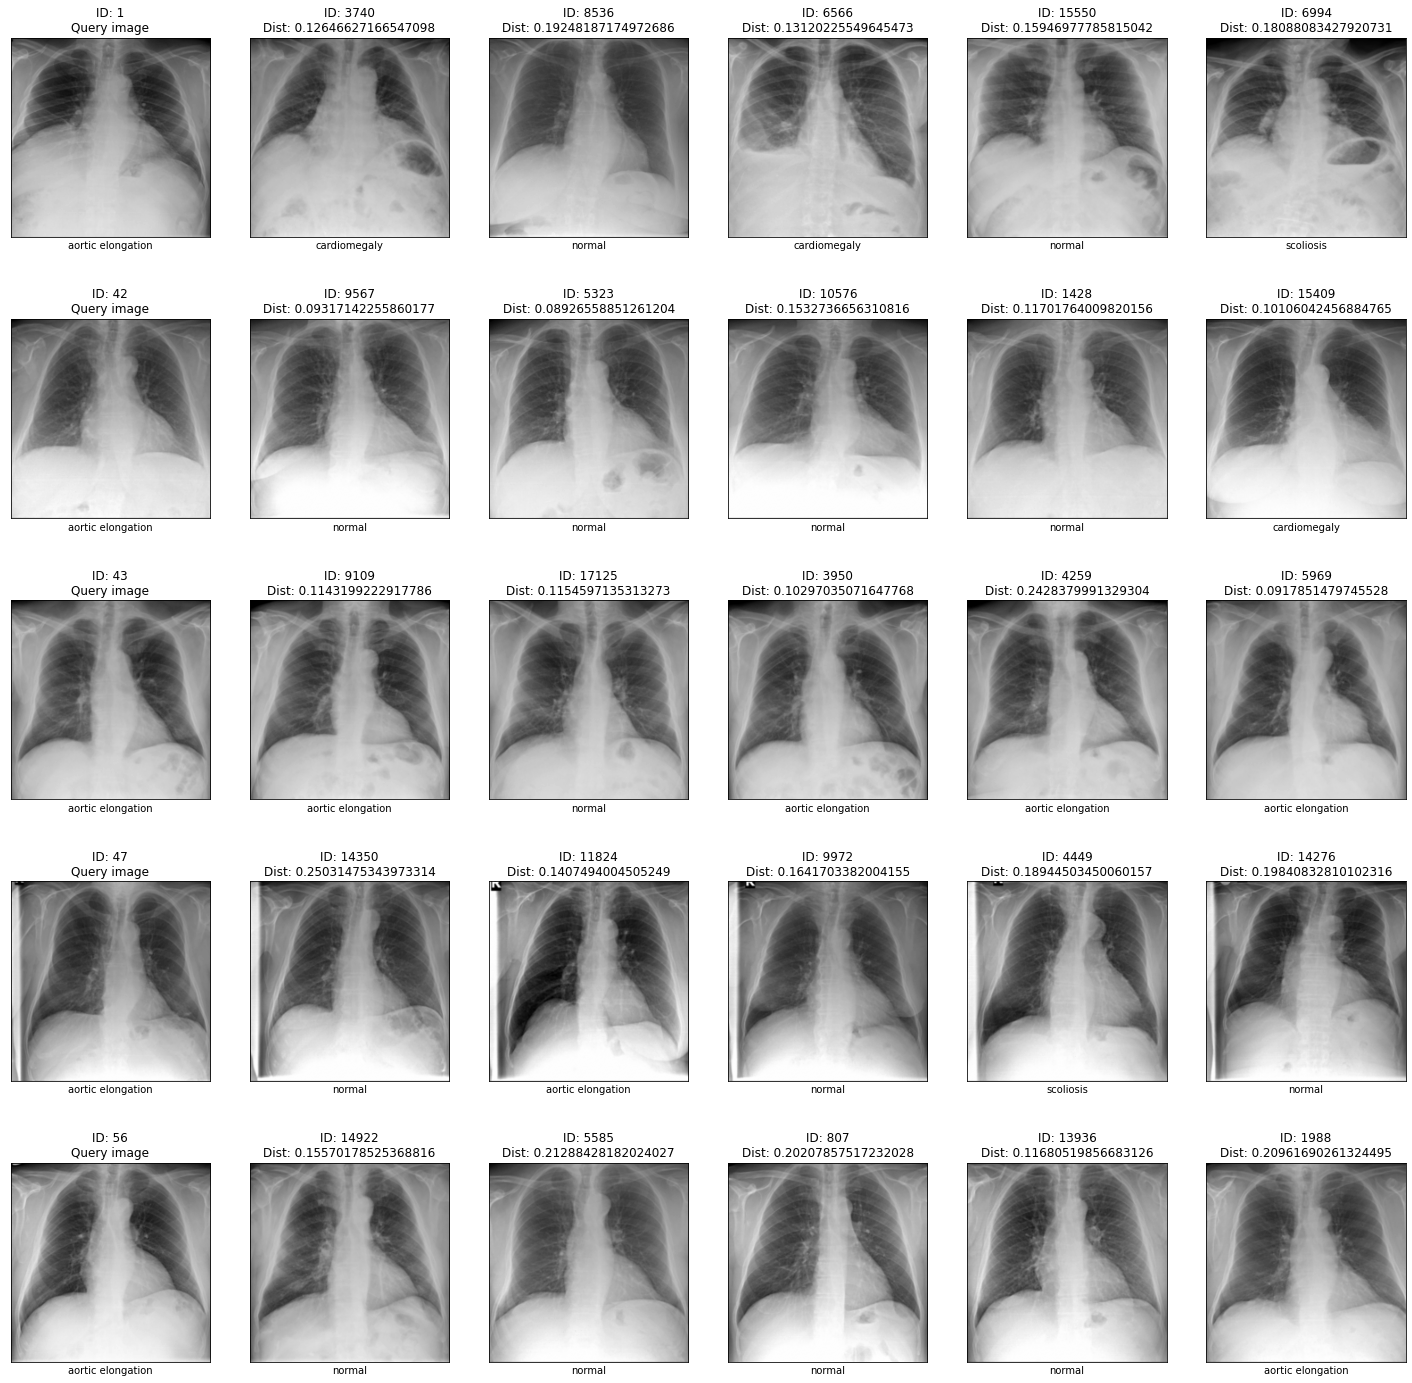

In [33]:
plot_nneighbors_filtered(data, encoder, n_neighbors=5, n_cases=5, vae=True, label="aortic elongation")

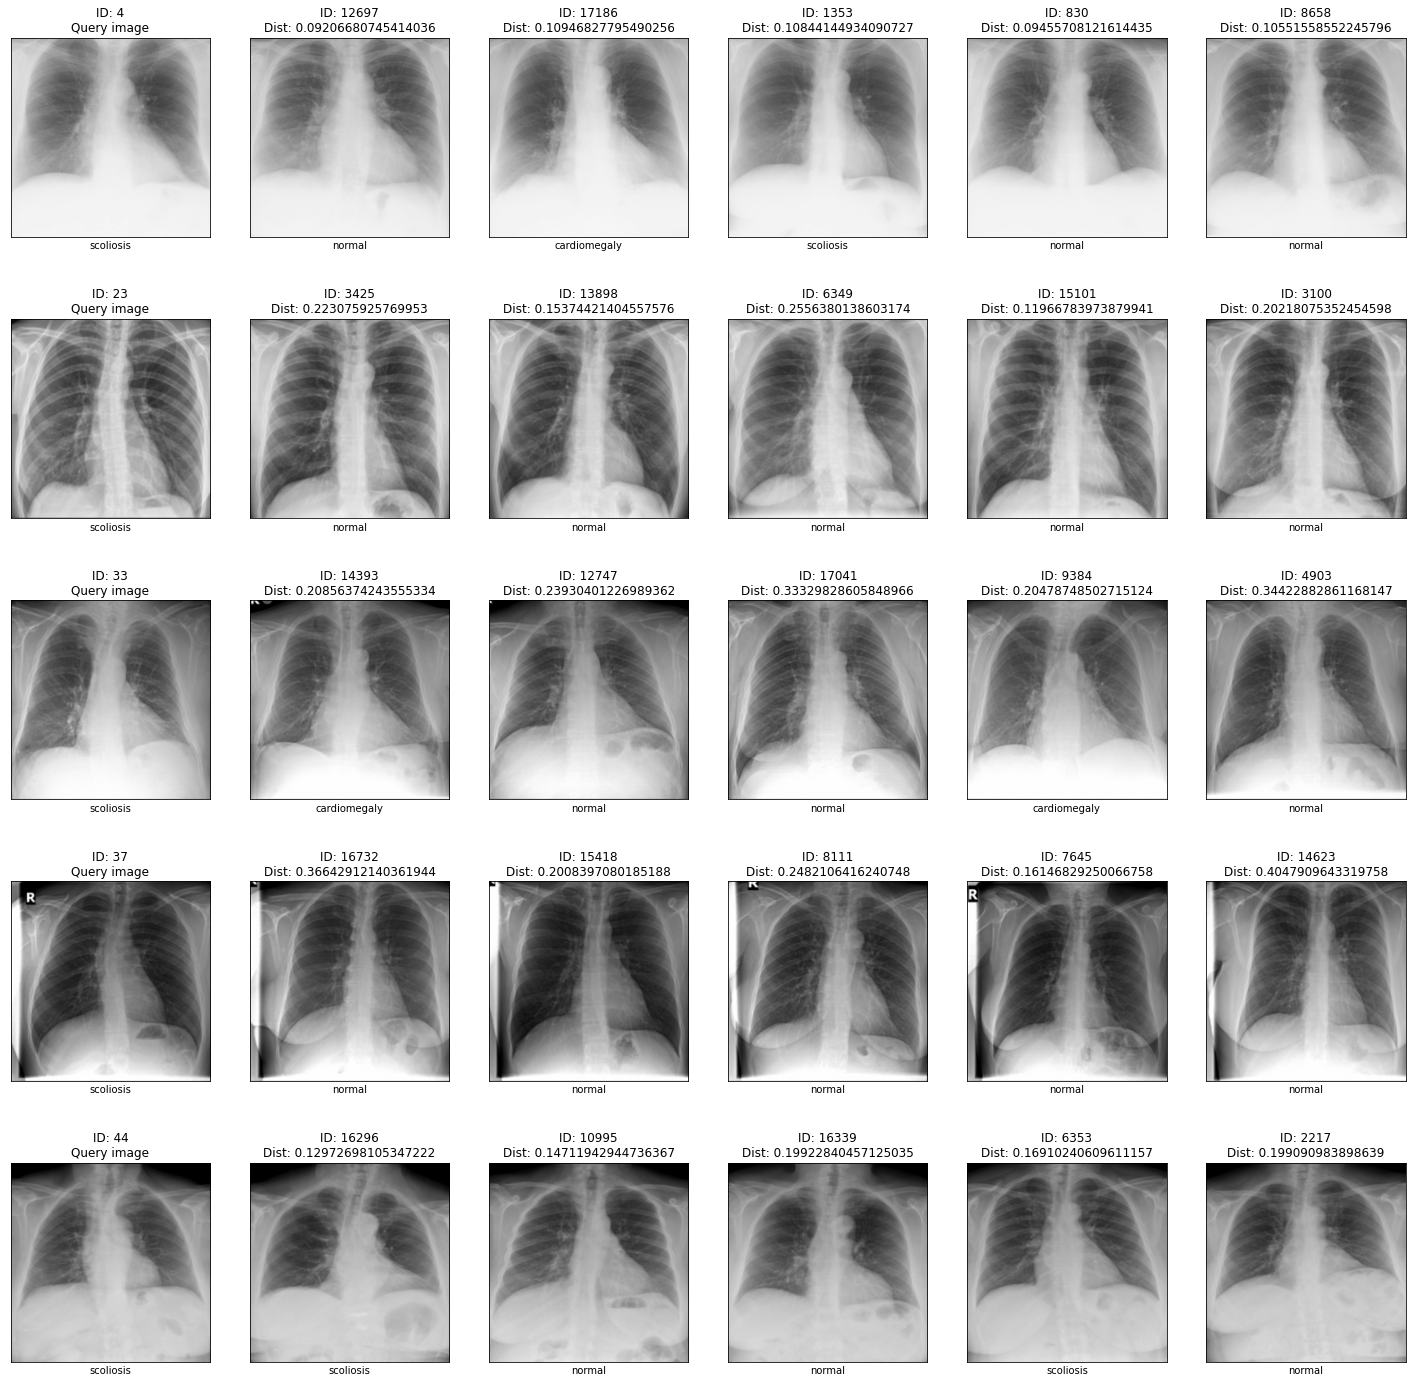

In [34]:
plot_nneighbors_filtered(data, encoder, n_neighbors=5, n_cases=5, vae=True, label="scoliosis")